# Importing dataset

The MNIST dataset is a popular choice for this task. It consists of 28x28 grayscale images of handwritten digits and has a training set of 60,000 examples and a test set of 10,000 examples.

Here, TensorFlow is used to load the MNIST dataset.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets
from sklearn.metrics import classification_report

In [2]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
labels = np.asarray(train_labels, dtype=np.int32)
test_labels = np.asarray(test_labels, dtype=np.int32)

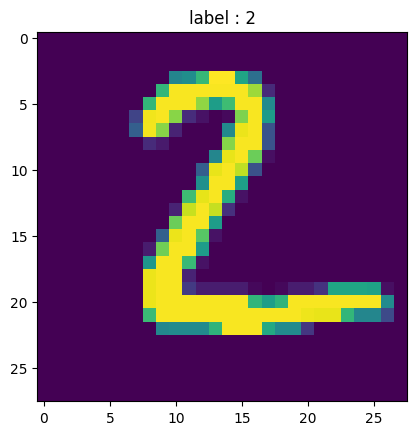

In [4]:
def display(i):
    img = test_images[i]
    plt.title('label : {}'.format(test_labels[i]))
    plt.imshow(img.reshape((28, 28)))
     
# image in TensorFlow is 28 by 28 px
display(1)

## Data preprocessing 

Preprocess the data to prepare it for training. Normalize the pixel values to be between 0 and 1 and flatten the 28x28 images into a 1D array of size 784.

In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

## Building model

In [6]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

## Compile model

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Training the model

In [8]:
model.fit(train_images, train_labels, epochs=25, batch_size=64, validation_split=0.2)

Epoch 1/25
750/750 [==============================] - 4s 4ms/step - loss: 0.3383 - accuracy: 0.9039 - val_loss: 0.1879 - val_accuracy: 0.9463
Epoch 2/25
750/750 [==============================] - 3s 4ms/step - loss: 0.1556 - accuracy: 0.9555 - val_loss: 0.1435 - val_accuracy: 0.9572
Epoch 3/25
750/750 [==============================] - 3s 3ms/step - loss: 0.1089 - accuracy: 0.9680 - val_loss: 0.1138 - val_accuracy: 0.9666
Epoch 4/25
750/750 [==============================] - 3s 4ms/step - loss: 0.0820 - accuracy: 0.9758 - val_loss: 0.1043 - val_accuracy: 0.9692
Epoch 5/25
750/750 [==============================] - 3s 4ms/step - loss: 0.0637 - accuracy: 0.9812 - val_loss: 0.1007 - val_accuracy: 0.9682
Epoch 6/25
750/750 [==============================] - 3s 4ms/step - loss: 0.0513 - accuracy: 0.9850 - val_loss: 0.0961 - val_accuracy: 0.9724
Epoch 7/25
750/750 [==============================] - 3s 3ms/step - loss: 0.0412 - accuracy: 0.9885 - val_loss: 0.0912 - val_accuracy: 0.9718
Epoch 

## Evaluating model

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')


313/313 [==============================] - 1s 2ms/step - loss: 0.0847 - accuracy: 0.9811
Test accuracy: 0.9811000227928162


## Predicting in test data

In [10]:
predictions = model.predict(test_images[:5])
print(predictions)

1/1 [==============================] - 0s 93ms/step
[[2.9727024e-10 4.9812245e-11 4.5007192e-11 1.1132560e-06 3.7325164e-18
  8.3181353e-14 7.3143513e-19 9.9999893e-01 2.5867120e-10 6.2886396e-10]
 [6.6698952e-11 6.8693393e-09 1.0000000e+00 1.6181126e-11 9.1276366e-24
  5.2431272e-14 5.4686585e-12 1.9996696e-22 1.4933212e-08 5.1429855e-16]
 [1.9105142e-09 9.9997699e-01 4.1530107e-06 2.3314091e-09 1.0465834e-06
  3.3686689e-11 3.5862357e-08 1.3372047e-06 1.6506252e-05 6.4784123e-10]
 [9.9999976e-01 2.5595013e-13 1.6888808e-07 2.4702384e-17 9.2874722e-18
  1.4123267e-13 1.2585838e-09 7.8986801e-08 8.5782067e-19 7.4465889e-13]
 [2.7037579e-13 4.7642849e-18 4.6165463e-12 1.4470365e-15 9.9999940e-01
  1.1498814e-16 9.4960313e-13 7.8439504e-09 2.4485637e-11 5.3777990e-07]]


In [11]:
predicted_classes = np.argmax(predictions, axis=1)
print(predicted_classes)

[7 2 1 0 4]


## Fine-tuning

In [12]:
fine_tuned_model = models.Sequential([
    layers.Reshape((28, 28, 1), input_shape=(784,)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

# Compile the fine-tuned model
fine_tuned_model.compile(optimizer='adam',
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])

# Fine-tune the model
fine_tuned_model.fit(train_images, train_labels, epochs=25, batch_size=64, validation_split=0.2)

# Evaluate the fine-tuned model
fine_tuned_test_loss, fine_tuned_test_acc = fine_tuned_model.evaluate(test_images, test_labels)
print(f'Fine-Tuned Model Test Accuracy: {fine_tuned_test_acc}')

Epoch 1/25
750/750 [==============================] - 32s 42ms/step - loss: 0.2439 - accuracy: 0.9254 - val_loss: 0.0652 - val_accuracy: 0.9813
Epoch 2/25
750/750 [==============================] - 31s 41ms/step - loss: 0.0762 - accuracy: 0.9771 - val_loss: 0.0564 - val_accuracy: 0.9828
Epoch 3/25
750/750 [==============================] - 31s 41ms/step - loss: 0.0539 - accuracy: 0.9839 - val_loss: 0.0548 - val_accuracy: 0.9831
Epoch 4/25
750/750 [==============================] - 31s 41ms/step - loss: 0.0397 - accuracy: 0.9874 - val_loss: 0.0424 - val_accuracy: 0.9873
Epoch 5/25
750/750 [==============================] - 30s 41ms/step - loss: 0.0305 - accuracy: 0.9909 - val_loss: 0.0434 - val_accuracy: 0.9874
Epoch 6/25
750/750 [==============================] - 30s 40ms/step - loss: 0.0240 - accuracy: 0.9923 - val_loss: 0.0452 - val_accuracy: 0.9868
Epoch 7/25
750/750 [==============================] - 31s 41ms/step - loss: 0.0191 - accuracy: 0.9941 - val_loss: 0.0459 - val_accuracy:

## Classification report

In [13]:
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

report = classification_report(test_labels, predicted_classes)
print("Base Model Classification Report:\n", report)

313/313 [==============================] - 0s 1ms/step
Base Model Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [14]:
fine_tuned_predictions = fine_tuned_model.predict(test_images)
fine_tuned_predicted_classes = np.argmax(fine_tuned_predictions, axis=1)

fine_tuned_report = classification_report(test_labels, fine_tuned_predicted_classes)
print("Fine-Tuned Model Classification Report:\n", fine_tuned_report)

313/313 [==============================] - 2s 7ms/step
Fine-Tuned Model Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



## Base Model Classification Report:
Accuracy: 98%
Precision: High precision for all classes, indicating a low false-positive rate.
Recall: High recall for all classes, indicating a low false-negative rate.
F1-Score: High F1-score for all classes, considering both precision and recall.

## Fine-Tuned Model Classification Report:
Accuracy: 99% (slightly improved compared to the base model).
Precision: Maintains high precision for all classes.
Recall: High recall for all classes.
F1-Score: High F1-score for all classes.

## Analysis:
The fine-tuned model shows a slight improvement in accuracy compared to the base model.
Both models exhibit high precision, recall, and F1-score for all classes, indicating strong performance.
Class 8 has a slightly lower recall in the fine-tuned model, suggesting that it might be slightly more challenging for the model to correctly classify instances of this class.

## Conclusion:
The fine-tuned model appears to perform slightly better than the base model, with a small increase in accuracy.
The high precision, recall, and F1-score for all classes suggest that both models are effective in classifying digits on the MNIST dataset.